In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.image as mpimg

In [ ]:
def plot3GrayImages(img1, img2, img3, titleImg1 = "", titleImg2 = "", titleImg3 = ""):
    plt.subplots(figsize=(18, 14))
    plt.subplot(131), plt.imshow(img1, cmap='gray'),plt.title(titleImg1)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img2, cmap='gray'),plt.title(titleImg2)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img3, cmap='gray'),plt.title(titleImg3)
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plot5Images(img1, img2, img3, img4, img5, titleImages = np.full(5, " ")):
    plt.subplots(figsize=(24, 14))
    plt.subplot(151), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),plt.title(titleImages[0])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(152), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),plt.title(titleImages[1])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(153), plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)),plt.title(titleImages[2])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(154), plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB)),plt.title(titleImages[3])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(155), plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB)),plt.title(titleImages[4])
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plot6GrayImages(img1, img2, img3, img4, img5, img6, titleImages = np.full(6, " ")):
    plt.subplots(figsize=(24, 14))
    plt.subplot(161), plt.imshow(img1, cmap='gray'),plt.title(titleImages[0])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(162), plt.imshow(img2, cmap='gray'),plt.title(titleImages[1])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(163), plt.imshow(img3, cmap='gray'),plt.title(titleImages[2])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(164), plt.imshow(img4, cmap='gray'),plt.title(titleImages[3])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(165), plt.imshow(img5, cmap='gray'),plt.title(titleImages[4])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(166), plt.imshow(img6, cmap='gray'),plt.title(titleImages[5])
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plotImage(img, title=""):
    plt.subplots(figsize=(15, 10))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()



*   Selecionar uma imagem da Internet de algum filme que possua um fundo uniforme (azul ou verde, por ex.) e aplicar a técnica de _chroma-keying_.



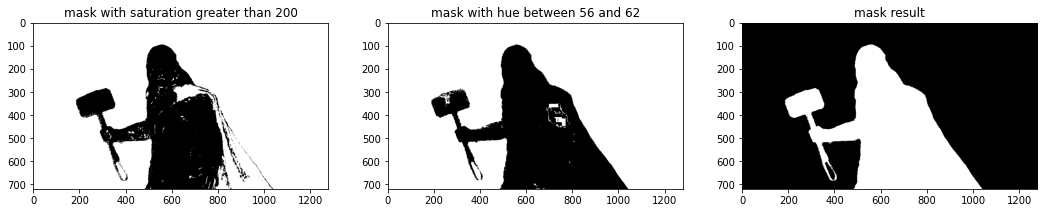

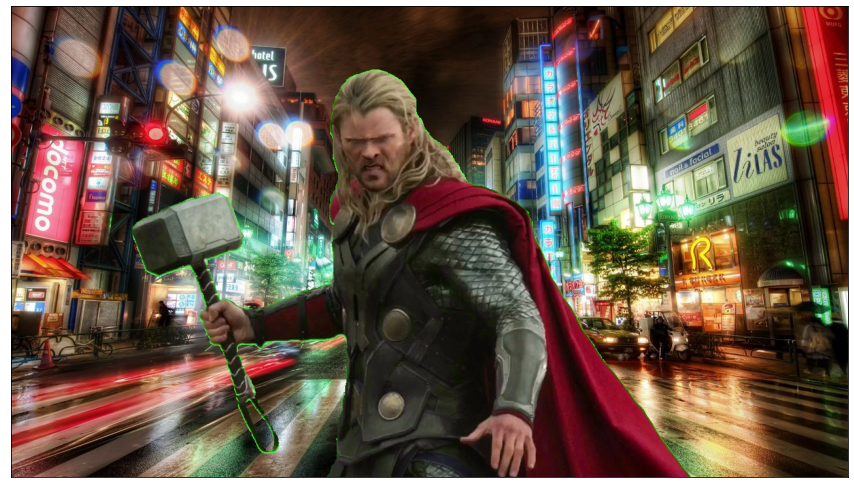

In [ ]:
img = cv.imread('thor.jpg')
backgroundImg = cv.imread('tokyo.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

imgH = img[:, :, 0]
imgS = img[:, :, 1]
imgV = img[:, :, 2]

# criando uma mask para os pixels com saturação maior que 200, se maior que 200 = 255
_, mask1 = cv.threshold(imgS, 200,255,cv.THRESH_BINARY)

# criando uma mask para os pixels com hue entre 56 e 62, se estiver entre 56 e 62 = 255
mask2 = cv.inRange(imgH, 56, 62)

# criando uma mask para os pixels com saturação maior que 200 e hue entre 56 e 62
maskResult = cv.bitwise_and(mask1, mask2)
notMaskResult = cv.bitwise_not(maskResult)

plot3GrayImages(mask1, mask2, notMaskResult, titleImg1 = "mask with saturation greater than 200", titleImg2 = "mask with hue between 56 and 62", titleImg3 = "mask result")

backgroundImgResult = cv.bitwise_and(backgroundImg, backgroundImg, mask=maskResult)

imgWithoutBackground = cv.bitwise_and(img, img, mask=notMaskResult)

plotImage(cv.add(cv.cvtColor(imgWithoutBackground, cv.COLOR_HSV2BGR), backgroundImgResult))

* Carregar uma imagem RGB e aplicar um filtro de borramento.

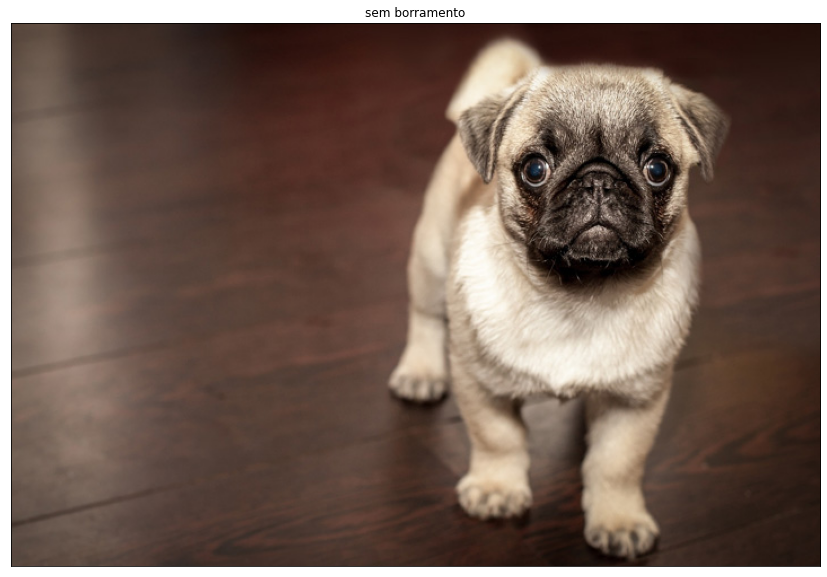

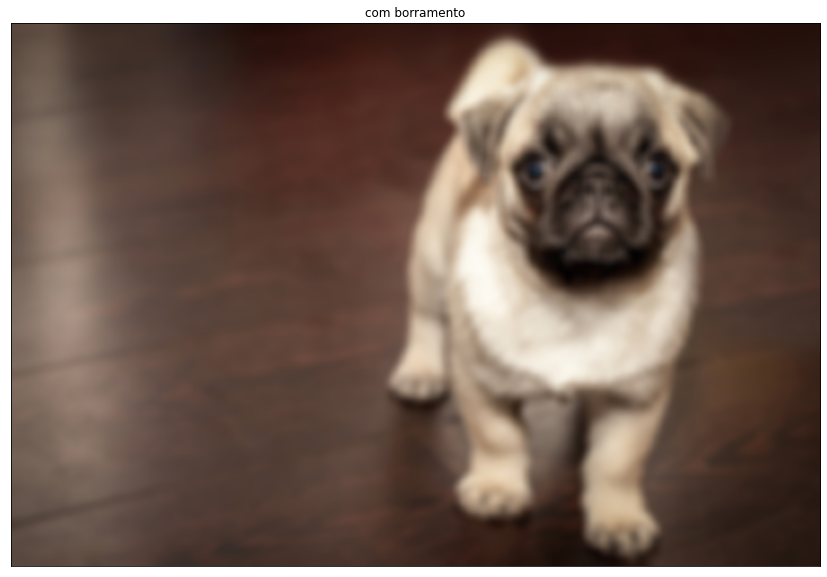

In [ ]:
img = cv.imread('cachorro.jpg')
plotImage(img, "sem borramento")

#imgB = cv.GaussianBlur(img[:, :, 0], (11, 11), cv.BORDER_DEFAULT)
#imgG = cv.GaussianBlur(img[:, :, 1], (11, 11), cv.BORDER_DEFAULT)
#imgR = cv.GaussianBlur(img[:, :, 2], (11, 11), cv.BORDER_DEFAULT)

#plot3GrayImages(imgB, imgG, imgR, titleImg1 = "Blue", titleImg2 = "Green", titleImg3 = "Red")
#plotImage(cv.merge((imgB, imgG, imgR)))
plotImage(cv.GaussianBlur(img, (11, 11), cv.BORDER_DEFAULT), "com borramento")

* Carregar uma imagem RGB e aplicar um filtro de realçe de bordas.

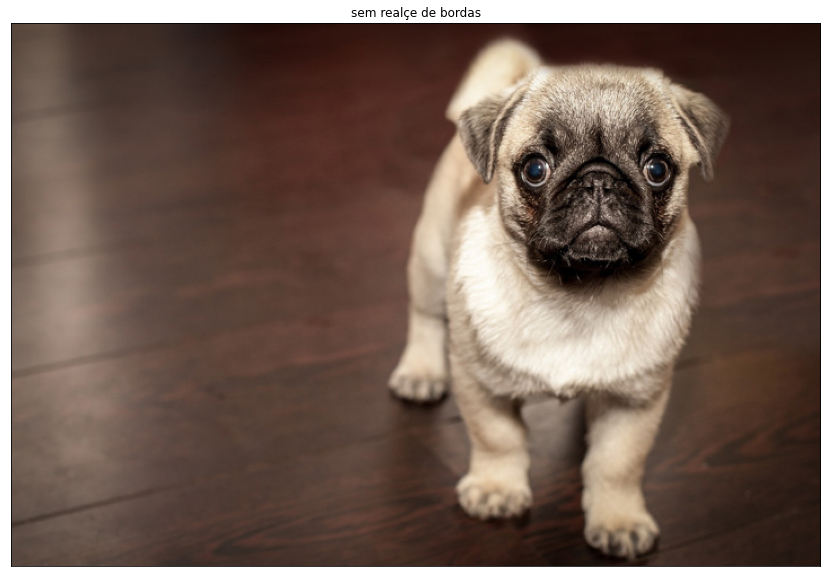

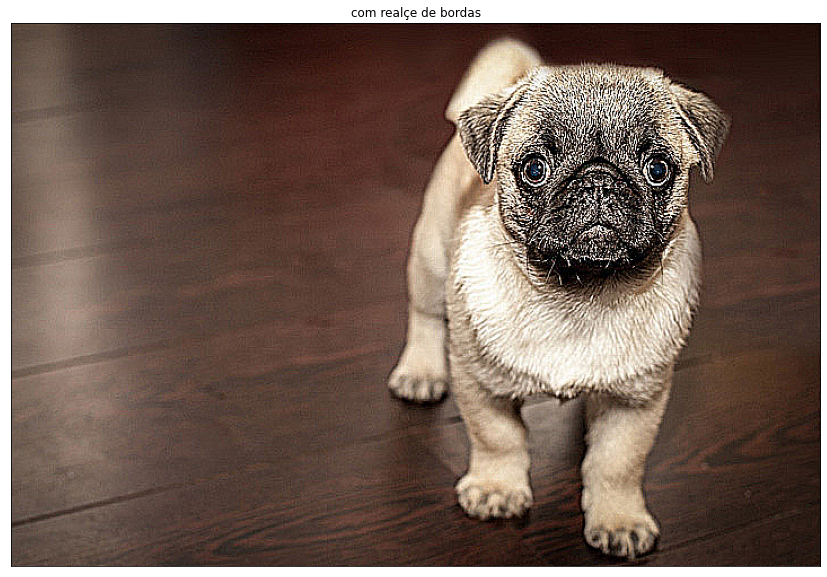

In [ ]:
img = cv.imread('cachorro.jpg')
plotImage(img, "sem realçe de bordas")
#img = cv.Laplacian(img, -1, 3)
laplacian = np.array([[-1, -1, -1],
                      [-1, 9, -1],
                      [-1, -1, -1]])

# imgB = cv.filter2D(img[:, :, 0], -1, laplacian)
# imgG = cv.filter2D(img[:, :, 1], -1, laplacian)
# imgR = cv.filter2D(img[:, :, 2], -1, laplacian)

# plot3GrayImages(imgB, imgG, imgR, titleImg1 = "Blue", titleImg2 = "Green", titleImg3 = "Red")
# plotImage(cv.merge((imgB, imgG, imgR)))
plotImage(cv.filter2D(img, -1, laplacian), "com realçe de bordas")

* Segmentar cada um dos 5 elementos distintos da imagem 'chips.png' do diretório da disciplina.

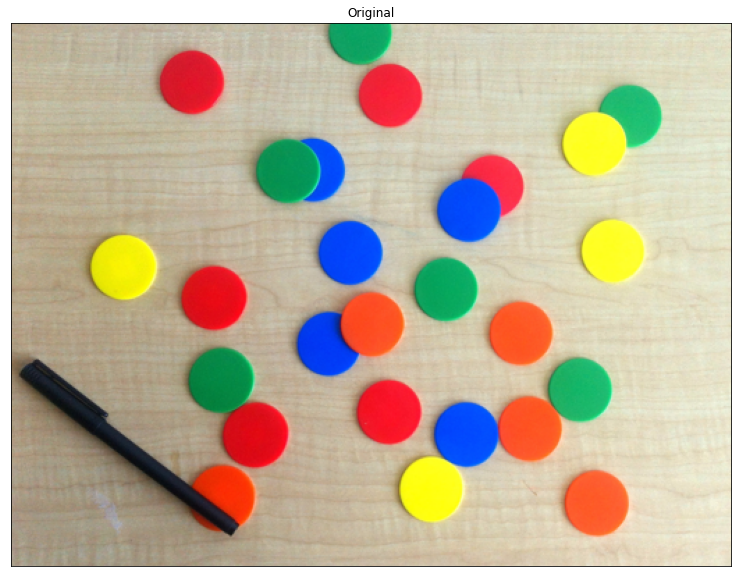


Imagem das máscaras: 



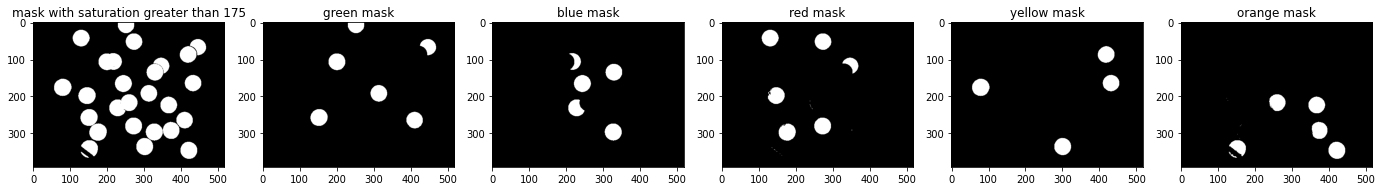


Imagem dos segmentos de cada elemento distinto: 



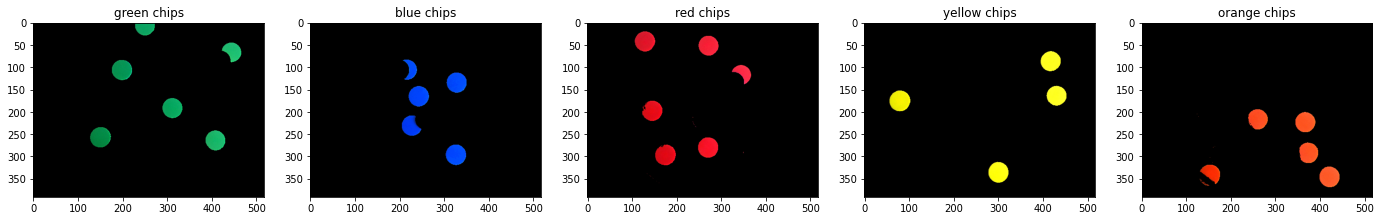

In [ ]:
img = cv.imread('chips.png')
plotImage(img, "Original")

img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

imgH = img[:, :, 0]
imgS = img[:, :, 1]
imgV = img[:, :, 2]

# criando uma máscara para os pixels com saturação maior que 175, se maior que 175 = 255
_, mask1 = cv.threshold(imgS, 175,255,cv.THRESH_BINARY)

# criando uma máscara para os pixels com hue entre 65 e 95(verde), 100 e 130(azul), 165 e 180(vermelho), 25 e 35(amarelo), 5 e 20(laranja)

greenH = [65, 95]
blueH = [100, 130]
redH = [165, 180]
yellowH = [25, 35]
orangeH = [5, 20]

greenMask = cv.inRange(imgH, greenH[0], greenH[1]) # verde
blueMask = cv.inRange(imgH, blueH[0], blueH[1]) # azul
redMask = cv.inRange(imgH, redH[0], redH[1]) # vermelho
yellowMask = cv.inRange(imgH, yellowH[0], yellowH[1]) # amarelo
orangeMask = cv.inRange(imgH, orangeH[0], orangeH[1]) # laranja

# criando a máscara resultante
greenMaskResult = cv.bitwise_and(mask1, greenMask)
blueMaskResult = cv.bitwise_and(mask1, blueMask)
redMaskResult = cv.bitwise_and(mask1, redMask)
yellowMaskResult = cv.bitwise_and(mask1, yellowMask)
orangeMaskResult = cv.bitwise_and(mask1, orangeMask)

print("\nImagem das máscaras: \n")

titles = ["mask with saturation greater than 175", "green mask", "blue mask", "red mask", "yellow mask", "orange mask"]
plot6GrayImages(mask1, greenMaskResult, blueMaskResult, redMaskResult, yellowMaskResult, orangeMaskResult, titles)

# aplicando as máscaras e convertendo para BGR
chipsImg = np.array([cv.cvtColor(cv.bitwise_and(img, img, mask=greenMaskResult), cv.COLOR_HSV2BGR),
                    cv.cvtColor(cv.bitwise_and(img, img, mask=blueMaskResult), cv.COLOR_HSV2BGR),
                    cv.cvtColor(cv.bitwise_and(img, img, mask=redMaskResult), cv.COLOR_HSV2BGR),
                    cv.cvtColor(cv.bitwise_and(img, img, mask=yellowMaskResult), cv.COLOR_HSV2BGR),
                    cv.cvtColor(cv.bitwise_and(img, img, mask=orangeMaskResult), cv.COLOR_HSV2BGR)
])

print("\nImagem dos segmentos de cada elemento distinto: \n")

titles = ["green chips", "blue chips", "red chips", "yellow chips", "orange chips"]

plot5Images(chipsImg[0], chipsImg[1], chipsImg[2], chipsImg[3], chipsImg[4], titles)